In [1]:
import numpy as np
from drawer import *
from data_gen import *
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_theme()
SEED=0

In [2]:
## define the function

In [3]:
def sigmoid(s):
    return 1/(1+np.exp(-s))
class CrossEntropy():
    ''' use the sigmoid function as the activate function'''
    def backward(self,X,y,w):
        s=-y*(X@w)
        h=sigmoid(s)
        return (-y*X.T)@h
    def __call__(self,X,y,w):
        N=y.shape[0]
        return 1/N*np.sum(-np.log(sigmoid(y*(X@w))))

class SGD():
    def __init__(self,learning_rate=0.1):
        self.learning_rate=learning_rate

    # def zero_grad(self):
    #     self.grad[:]=0

    def step(self,w,grad):
        w = w - self.learning_rate*grad
        return w

In [4]:
class Logistic_Regression():
    def __init__(self,data,loss_fn,optimizer):
        self.data=(np.hstack((np.ones((data[1].shape[0],1)),data[0])),data[1])
        self.w=np.random.randn(3)
        self.loss_fn=loss_fn
        self.optimizer=optimizer

    def predict(self,X,is_test=True):
        '''测试时做增广, fit里用的话不再做增广(初始化的时候已经做过了)'''
        if is_test:
            X=np.hstack((np.ones((X.shape[0],1)),X))
        prob=sigmoid(X@self.w)
        return np.sign(prob-0.5),prob

    def validate(self,data):
        X=data[0]
        y=data[1]
        h , _ =np.sign(self.predict(X))
        mistake_indices = np.where(h!=y)[0]
        return (X.shape[0]-len(mistake_indices))/X.shape[0]

    def fit(self,epoch,batch_size):
        loss_history={}
        for e in range(epoch):
            batch_num=self.data[1].shape[0]//batch_size
            for i in range(batch_num):
                try:
                    batch_data=(self.data[0][i*batch_size:(i+1)*batch_size,:],self.data[1][i*batch_size:(i+1)*batch_size])
                except:
                    batch_data=(self.data[0][i*batch_size:,:],self.data[1][i*batch_size:])
                    batch_size=self.data[1].shape[0]%batch_size
                # print(batch_data)
                pred , _ = self.predict(batch_data[0],is_test=False)
                loss=self.loss_fn(batch_data[0],batch_data[1],self.w)

                # self.optimizer.zero_grad()
                grad=0
                grad=self.loss_fn.backward(batch_data[0],batch_data[1],self.w)
                self.w=self.optimizer.step(self.w,grad)
            loss_history[e]=loss
        return loss_history

In [5]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)

 train accuracy: 1.0
 test accuracy: 1.0


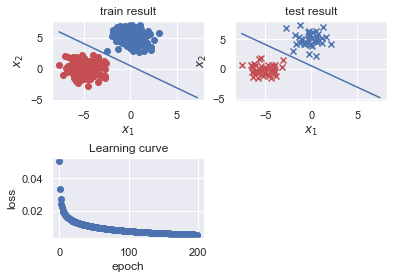

In [6]:
def algorithm(learning_rate=0.01,epoch=200,batch_size=40,fig_title=None):
    # sgd method
    loss_fn=CrossEntropy()
    optimizer=SGD(learning_rate=learning_rate)
    model=Logistic_Regression((X_train,y_train),loss_fn,optimizer)
    loss_history=model.fit(epoch,batch_size)

    f=plt.figure()
    data=(X_train,y_train)
    plt.subplot(221)
    draw(data,model.w,marker='o')
    plt.title('train result')
    print(str(fig_title),'train accuracy:',model.validate(data))

    data=(X_test,y_test)
    plt.subplot(222)
    draw(data,model.w,marker='x')
    plt.title('test result')
    print(str(fig_title),'test accuracy:',model.validate(data))

    # learning curve
    plt.subplot(2,2,3)
    plt.scatter(x=loss_history.keys(),y=loss_history.values())
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Learning curve')
    plt.subplots_adjust(hspace=0.7)
    f.suptitle(fig_title)

algorithm(fig_title='')

# 展开实验
## 测试样本数量影响

100 samples train accuracy: 1.0
100 samples test accuracy: 1.0
300 samples train accuracy: 1.0
300 samples test accuracy: 1.0
500 samples train accuracy: 1.0
500 samples test accuracy: 1.0


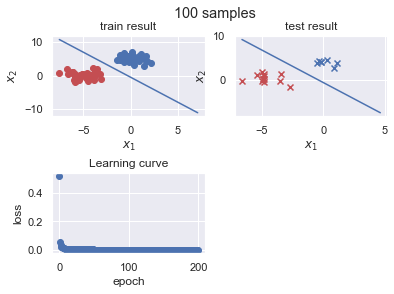

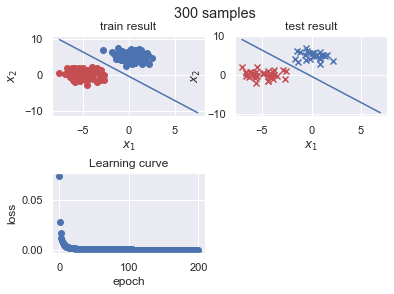

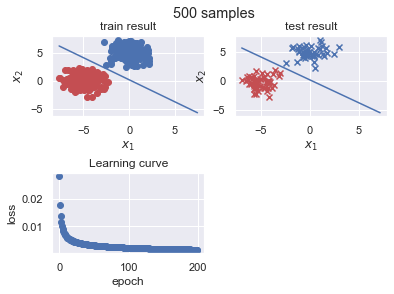

In [7]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),100,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='100 samples')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),300,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='300 samples')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),500,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='500 samples')

### 结论
 可见数据量较大时, 较少的epoch即可获得较低的loss, 只用进行较少的迭代便可收敛
## 测试样本分布影响

cov matrix both are I train accuracy: 0.96875
cov matrix both are I test accuracy: 0.975


cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] train accuracy: 1.0
cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]] test accuracy: 1.0


cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] train accuracy: 0.959375
cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]] test accuracy: 0.9375




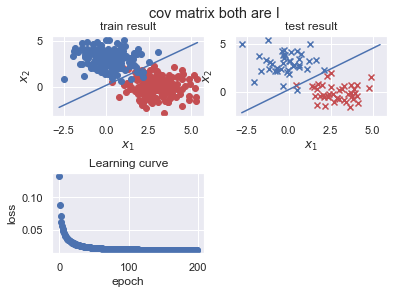

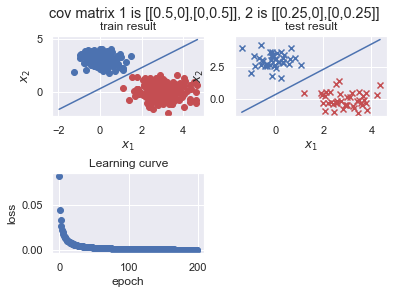

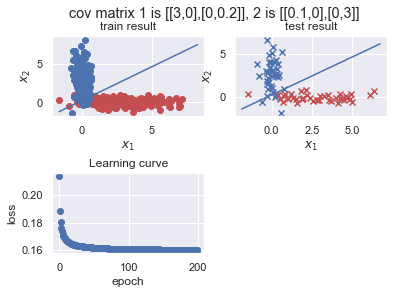

In [8]:
data=data_generator([3,0],np.eye(2),[0,3],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix both are I')
print('\n')

data=data_generator([3,0],[[0.5,0],[0,0.5]],[0,3],[[0.25,0],[0,0.25]],400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix 1 is [[0.5,0],[0,0.5]], 2 is [[0.25,0],[0,0.25]]')
print('\n')


data=data_generator([3,0],[[3,0],[0,0.2]],[0,3],[[0.1,0],[0,3]],400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(fig_title='cov matrix 1 is [[3,0],[0,0.2]], 2 is [[0.1,0],[0,3]]')
print('\n')

### 结论
 可见, 当样本较为分散时, 结果较差, 而当样本聚集程度较高, 方差比较小时, 结果较好
## 测试学习率的影响

0.01 learning rate train accuracy: 1.0
0.01 learning rate test accuracy: 1.0
0.05 learning rate train accuracy: 1.0
0.05 learning rate test accuracy: 1.0
0.1 learning rate train accuracy: 1.0
0.1 learning rate test accuracy: 1.0


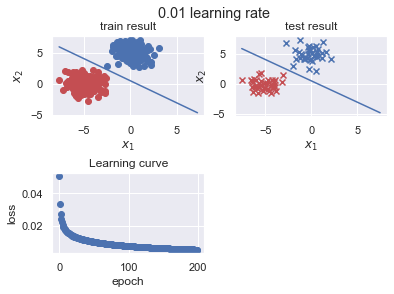

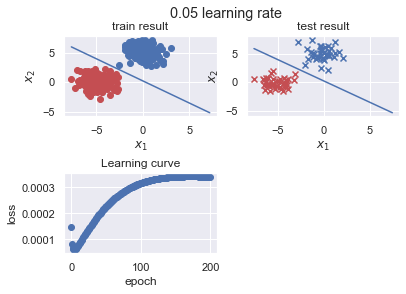

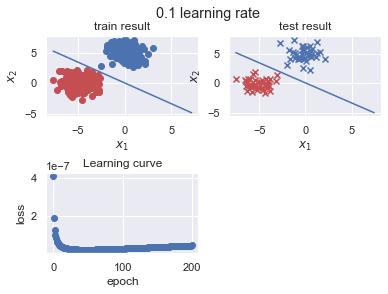

In [9]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(learning_rate=0.01,fig_title='0.01 learning rate')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(learning_rate=0.05,fig_title='0.05 learning rate')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(learning_rate=0.1,fig_title='0.1 learning rate')

### 结论
 可见, 适当调大学习率可以使损失函数收敛的更快, 但如果没有调节好的话可能反而会使得损失函数变大
## 测试batch size的影响

batch size: 5 train accuracy: 1.0
batch size: 5 test accuracy: 1.0
batch size: 20 train accuracy: 1.0
batch size: 20 test accuracy: 1.0
batch size: 80 train accuracy: 1.0
batch size: 80 test accuracy: 1.0


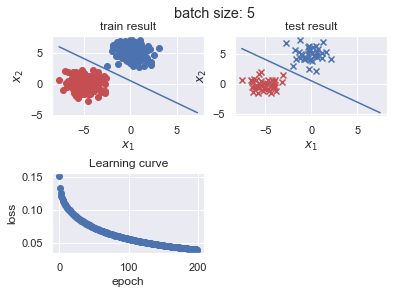

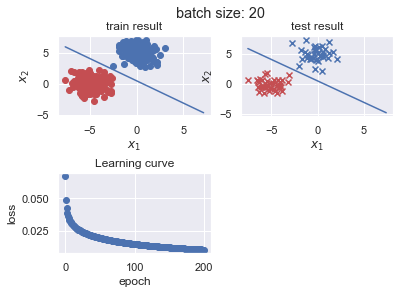

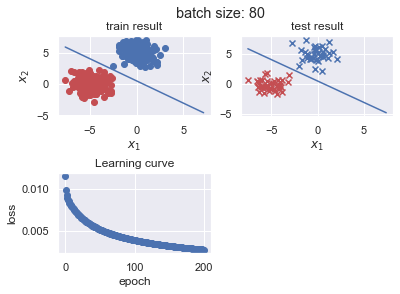

In [10]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(batch_size=5,fig_title='batch size: 5')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(batch_size=20,fig_title='batch size: 20')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(batch_size=80,fig_title='batch size: 80')

### 结论
 可见, 较大的batch_size会使得结果收敛更快, 在较少的epoch数量后就得到较为理想的结果
## 测试epoch的影响

10 epoch train accuracy: 1.0
10 epoch test accuracy: 1.0
100 epoch train accuracy: 1.0
100 epoch test accuracy: 1.0
1000 epoch train accuracy: 1.0
1000 epoch test accuracy: 1.0


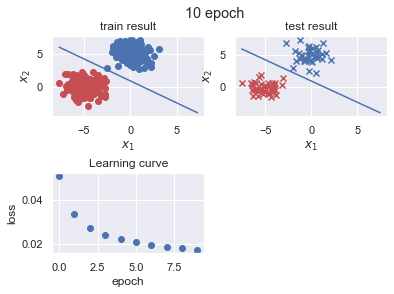

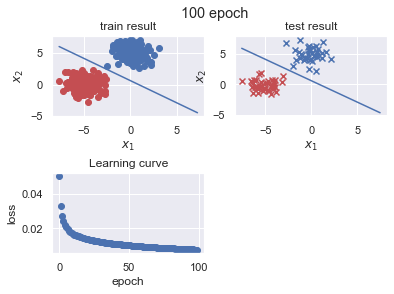

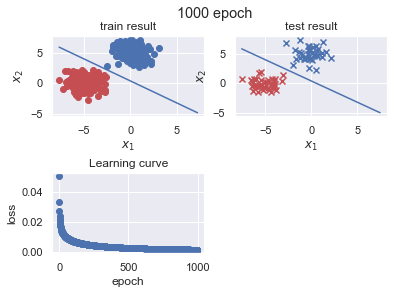

In [11]:
data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(epoch=10,fig_title='10 epoch')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(epoch=100,fig_title='100 epoch')

data=data_generator([-5,0],np.eye(2),[0,5],np.eye(2),400,seed=SEED)
X_train,X_test,y_train,y_test=train_test_split(data[0],data[1],train_size=0.8,test_size=0.2,random_state=SEED)
algorithm(epoch=1000,fig_title='1000 epoch')

### 结论
 可以看出, 对于当前这种样本分布, 样本具有较为明显的线性分界线时, 很少的epoch即可以达到收敛状态, 并不需要进行很多次的迭代